# Movielens Dataset Temporal Analysis 

In [1]:
# Center All Plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Load Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Configure

In [4]:
# Load Dataset
movies = pd.read_csv(r'C:/Users/Yukawa/datasets/ml-latest-small/movies.csv')
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [5]:
ratings = pd.read_csv(r'C:/Users/Yukawa/datasets/ml-latest-small/ratings.csv')
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [6]:
# Organise Ratings
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop= True)
print(ratings.head())

   userId  movieId  rating   timestamp
0       1        1     4.0   964982703
1     517        1     4.0  1487954343
2     213        1     3.5  1316196157
3     514        1     4.0  1533872400
4     214        1     3.0   853937855


In [7]:
# Split title and release year in separate columns in movies dataframe. Convert year to timestamp.
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]
print(movies.head())

   movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                       Comedy  1995.0  


In [8]:
# Categorize movies genres properly. 
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
print(genres_unique)

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


In [9]:
genres_unique = pd.DataFrame(genres_unique, columns=['genres']) # Format into DataFrame to store later
print(genres_unique)

                genres
0            Adventure
1            Animation
2             Children
3               Comedy
4              Fantasy
5              Romance
6                Drama
7               Action
8                Crime
9             Thriller
10              Horror
11             Mystery
12              Sci-Fi
13                 War
14             Musical
15         Documentary
16                IMAX
17             Western
18           Film-Noir
19  (no genres listed)


In [10]:
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.drop('genres', inplace=True, axis=1)

In [11]:
# Modify rating timestamp format (from seconds to datetime year)

ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s', origin='unix')
ratings.timestamp = ratings.timestamp.dt.year
ratings.timestamp.head()

0    2000
1    2017
2    2011
3    2018
4    1997
Name: timestamp, dtype: int64

In [12]:
# Check and clean NaN values
print ("Number of movies Null values: ", max(movies.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)

Number of movies Null values:  13
Number of ratings Null values:  0


##  Explore The Movielens Dataset

### 1. Movies Released per Year

In [13]:
# Let's work with a temp smaller slice 'dftmp' of the original dataframe to reduce runtime (ratings hass +2MM rows)
dftmp = movies[['movieId', 'year']].groupby('year')
print(dftmp.head())

      movieId    year
0           1  1995.0
1           2  1995.0
2           3  1995.0
3           4  1995.0
4           5  1995.0
...       ...     ...
9019   140541  1908.0
9655   182715  2018.0
9661   183011  2018.0
9665   183295  2018.0
9668   183611  2018.0

[490 rows x 2 columns]


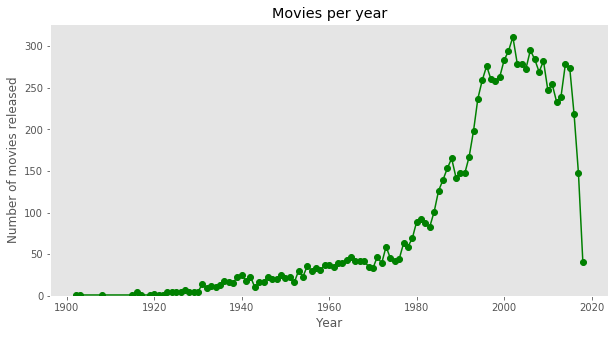

In [14]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dftmp.year.first(), dftmp.movieId.nunique(), "g-o")
ax1.grid(None)
ax1.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')
plt.title('Movies per year')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^ax1$)

### 2. Ratings per Year

In [15]:
dftmp = ratings[['rating', 'timestamp']].groupby('timestamp')
print(dftmp.head())

     rating  timestamp
0       4.0       2000
1       5.0       1996
2       3.5       2006
3       3.0       2007
4       4.0       2006
..      ...        ...
432     0.5       2011
473     5.0       1998
494     4.0       2013
513     5.0       1998
704     5.0       2014

[115 rows x 2 columns]


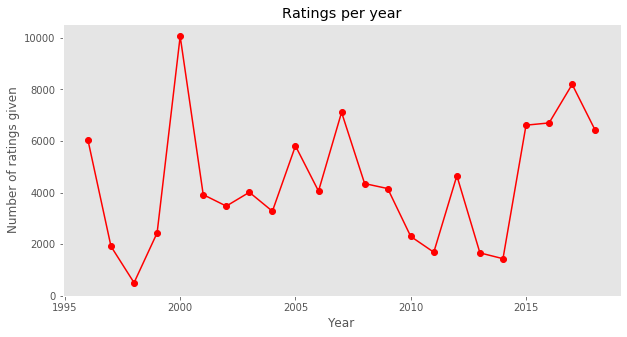

In [16]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dftmp.timestamp.first(), dftmp.rating.count(), "r-o")
ax1.grid(None)
ax1.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of ratings given')
plt.title('Ratings per year')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^ax1$)

### 3. Average Movie Rating

In [17]:
dftmp = movies[['movieId', 'year']].set_index('movieId').join(
    ratings[['movieId','rating']].groupby('movieId').mean())
print(dftmp.head())

           year    rating
movieId                  
1        1995.0  3.920930
2        1995.0  3.431818
3        1995.0  3.259615
4        1995.0  2.357143
5        1995.0  3.071429


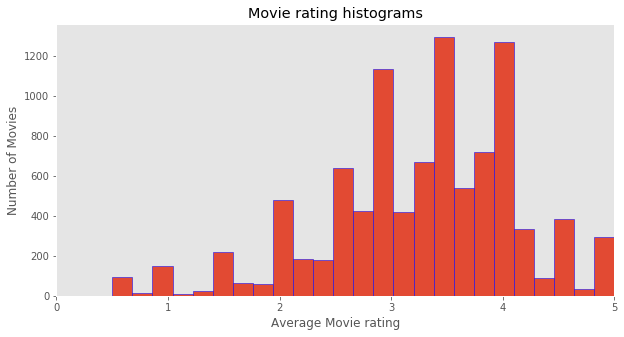

In [18]:
dftmp.rating.hist(bins=25, grid=False, edgecolor='b',figsize=(10,5))
plt.xlim(0,5)
plt.xlabel('Average Movie rating')
plt.ylabel('Number of Movies')
plt.title('Movie rating histograms')
plt.show()
# Housekeeping
%reset_selective -f (^dftmp$)

### 4. Average Movie Ratings Per Year

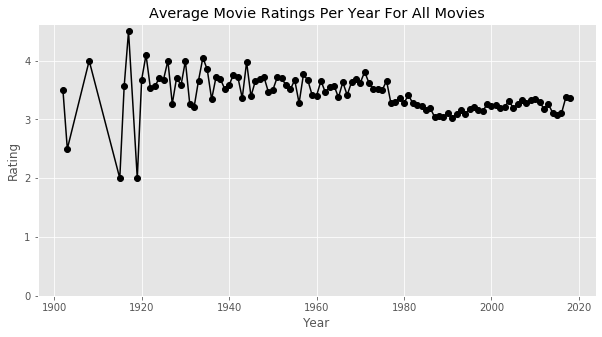

In [19]:
plt.figure(figsize=(10,5))

dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "r-o", label='All genres', color='black')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Movie Ratings Per Year For All Movies')
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$)

### 5. Average Movie Ratings Per Year In Detail

In [20]:
first_rating_timestamp = ratings['timestamp'].min()
print("First Movie Released at",first_rating_timestamp)

First Movie Released at 1996


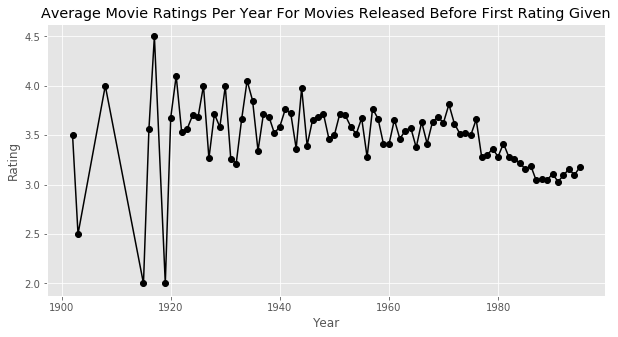

In [21]:
plt.figure(figsize=(10,5))

dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp[dftmp['year'] < first_rating_timestamp]
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "r-o", label='All genres', color='black')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Movie Ratings Per Year For Movies Released Before First Rating Given')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$)

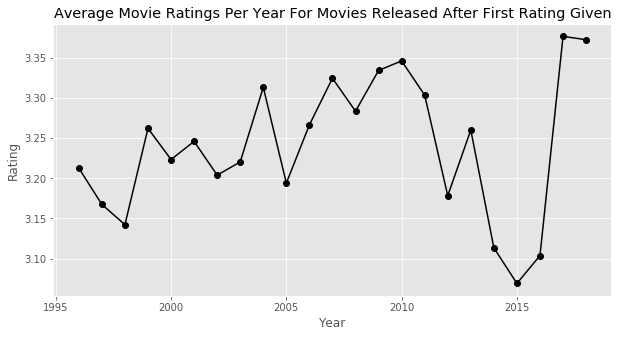

In [22]:
plt.figure(figsize=(10,5))

dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp[dftmp['year'] >= first_rating_timestamp]
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "r-o", label='All genres', color='black')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Movie Ratings Per Year For Movies Released After First Rating Given')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$)

### 6. Average Rating Per User

In [23]:
dftmp = ratings[['userId','rating']].groupby('userId').mean()
print(dftmp.head())

          rating
userId          
1       4.366379
2       3.948276
3       2.435897
4       3.555556
5       3.636364


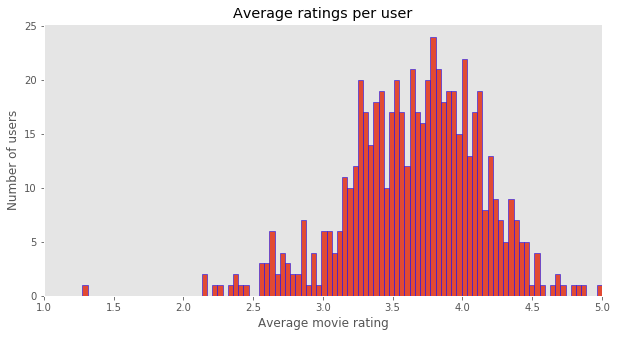

In [24]:
# Plot histogram
dftmp.rating.hist(bins=100, grid=False, edgecolor='b',figsize=(10,5))

plt.xlim(1,5)
plt.xlabel ('Average movie rating')
plt.ylabel ('Number of users')
plt.title ('Average ratings per user')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

### 7. Ratings Per User

In [25]:
dftmp = ratings[['userId', 'movieId']].groupby('userId').count()
dftmp.columns=['num_ratings']
dftmp.sort_values(by='num_ratings', inplace=True, ascending=False)
print(dftmp.head(10))

        num_ratings
userId             
414            2698
599            2478
474            2108
448            1864
274            1346
610            1302
68             1260
380            1218
606            1115
288            1055


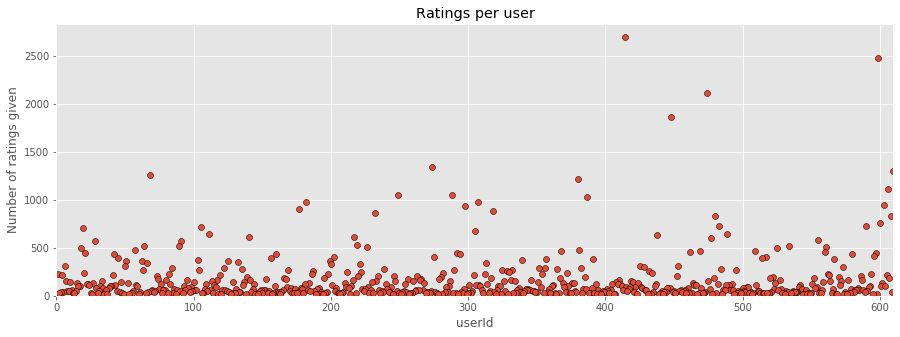

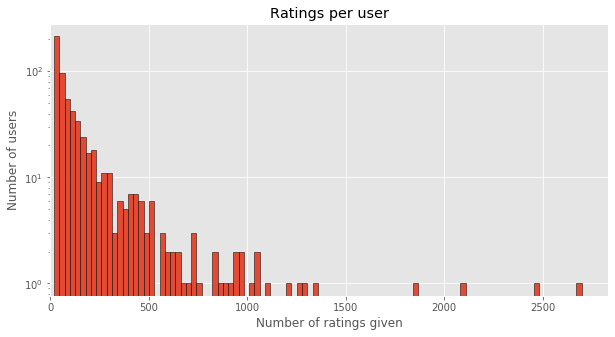

In [26]:
# Scatter plot of all users and individual ratings count.
plt.figure(figsize=(15,5))
plt.scatter(dftmp.index, dftmp.num_ratings, edgecolor='black')
plt.xlim(0,len(dftmp.index))
plt.ylim(0,)
plt.title('Ratings per user')
plt.xlabel('userId')
plt.ylabel('Number of ratings given')
plt.show()

# Histogram of ratings counts.
plt.figure(figsize=(10,5))
plt.hist(dftmp.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of users')
plt.xlim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

### 8. Rating Per Movie

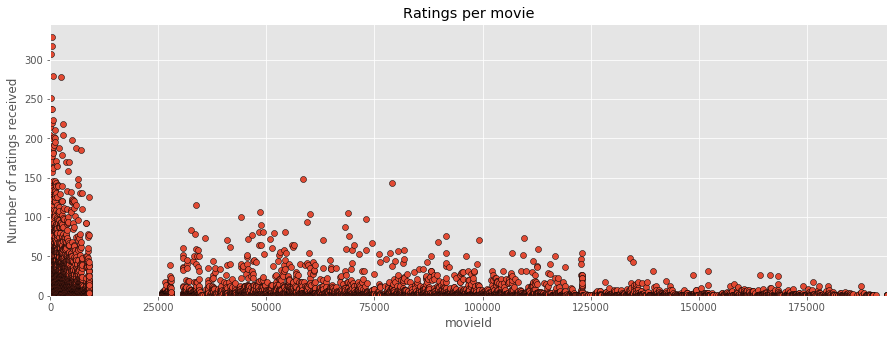

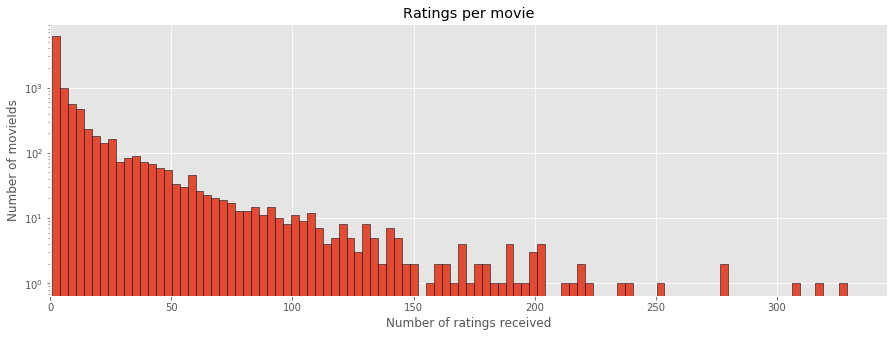

In [27]:
dftmp = ratings[['userId', 'movieId']].groupby('movieId').count()
dftmp.columns=['num_ratings']
plt.figure(figsize=(15,5))
plt.scatter(dftmp.index, dftmp.num_ratings, edgecolor='black')
plt.xlim(0,dftmp.index.max())
plt.ylim(0,)
plt.title('Ratings per movie')
plt.xlabel('movieId')
plt.ylabel('Number of ratings received')
plt.show()

# Histogram of ratings counts.
plt.figure(figsize=(15,5))
plt.hist(dftmp.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per movie')
plt.xlabel('Number of ratings received')
plt.ylabel('Number of movieIds')
plt.xlim(0,)
plt.show()

In [28]:
# Let's check those movies with +1k reviews, those should be pretty popular movies!
print(movies.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>100]]['title'])

movieId
1                                 Toy Story
2                                   Jumanji
6                                      Heat
10                                GoldenEye
32       Twelve Monkeys (a.k.a. 12 Monkeys)
                        ...                
48516                         Departed, The
58559                      Dark Knight, The
60069                                WALL·E
68954                                    Up
79132                             Inception
Name: title, Length: 134, dtype: object


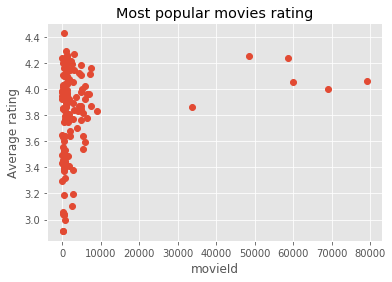

In [29]:
# Let's check the average rating too, those should be pretty good movies!
ratings.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>100]].groupby('movieId').mean().rating.plot(style='o')
plt.ylabel('Average rating')
plt.title('Most popular movies rating')
plt.show()

In [30]:
# Which is the best most popular movie ever??
tmp = ratings.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>100]].groupby('movieId').mean()
best = movies.set_index('movieId').loc[tmp.rating.idxmax].title
print ('Best most popular movie ever is...%s' %best)

Best most popular movie ever is...Shawshank Redemption, The


In [31]:
# Housekeeping
%reset_selective -f (^dftmp$|^tmp$|^best$)